In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_bandit_function(bandits_means, bandits_sigma=1):
    def bandit_function(action):
        if action >= 0 and action < len(bandits_means):
            return np.random.normal(bandits_means[action], bandits_sigma)
        else: 
            raise Exception("Wrong action: %s"%(action))
    return bandit_function

In [4]:
bandit_means = [-2.04402703, 0.78691329, -1.51854861, -0.74964035, 0.87538815, 1.51307674, 
                -1.43232683, -0.62838404, -0.03584927, -0.29624793]

In [5]:
bandit_function = get_bandit_function(bandit_means)
print(bandit_function(1))

0.9599918718350575


In [6]:
arr = list()
for i in range(1000):
    arr.append(bandit_function(1))

(array([   4.,   16.,   65.,  154.,  217.,  278.,  165.,   72.,   21.,    8.]),
 array([-2.63975934, -1.9722762 , -1.30479306, -0.63730993,  0.03017321,
         0.69765635,  1.36513949,  2.03262262,  2.70010576,  3.3675889 ,
         4.03507204]),
 <a list of 10 Patch objects>)

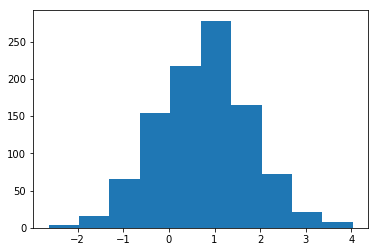

In [7]:
plt.hist(arr)

### get_new_q

In [8]:
def get_new_q(qn, n, rn):
    return qn + (1 / n) * (rn - qn), n + 1

### Test get_new_q

In [13]:
qn = 0
n  = 1
rn = 3
qn, n = get_new_q(qn, n, rn)
print(qn)
print(n)
rn = 2
qn, n = get_new_q(qn, n, rn)
print(qn)
print(n)

3.0
2
2.5
3


### get_new_avg

In [14]:
def get_new_avg(old_avg, n, new_value):
    return ((old_avg * n) + new_value) / (n + 1)

### Test get_new_avg()

In [27]:
arr1 = np.array([1,2,3,4,5,6])
print(np.average(arr1))

arr2 = np.array([1,2,3,4,5])
print(get_new_avg(np.average(arr2), arr2.size, 6))

3.5
3.5


### get_max_qs

In [136]:
def get_max_qs(qs):
    tmp_qs = np.array(qs)
    max_qs = np.array([], dtype=int)
    max_q = np.amax(tmp_qs)
    for i in range(tmp_qs.size):
        if np.amax(tmp_qs) == max_q:
            max_qs = np.append(max_qs, np.argmax(tmp_qs))
            tmp_qs[np.argmax(tmp_qs)] = np.amin(tmp_qs) - 1
        else:
            break
    return max_qs

### Test get_max_qs

In [137]:
print(get_max_qs(np.array([0,0,0,0,0,1])))
print(get_max_qs(np.array([0,1,0,1,0,1])))
print(get_max_qs(np.array([1,1,1,1,1,1])))

[5]
[1 3 5]
[0 1 2 3 4 5]


### choose_action

In [138]:
def choose_action(epsilon, qs):
    if (np.random.randint(0, 100, dtype=int) + 1) / 100 <= epsilon:
        return np.random.randint(0, qs.size, dtype=int)
    else:
        max_qs = get_max_qs(qs) 
        return max_qs[np.random.randint(0, max_qs.size, dtype=int)]

### Test choose_action

In [139]:
print(choose_action(0, np.array([0,0,1])))
print(choose_action(0, np.array([0,1,0])))
print(choose_action(0, np.array([1,0,0])))
print(choose_action(0, np.array([0,1,1])))
print(choose_action(0, np.array([1,1,0])))
print(choose_action(0, np.array([1,0,1])))
print(choose_action(0, np.array([1,1,1])))
print('---------------------------------')
print(choose_action(1, np.array([0,0,1])))
print(choose_action(1, np.array([0,1,0])))
print(choose_action(1, np.array([1,0,0])))
print(choose_action(1, np.array([0,1,1])))
print(choose_action(1, np.array([1,1,0])))
print(choose_action(1, np.array([1,0,1])))
print(choose_action(1, np.array([1,1,1])))

2
1
0
2
0
2
2
---------------------------------
0
2
2
0
1
0
1


### get_average_rewards

In [156]:
def get_average_rewards(epsilon=0.1, optimistic=0., nb_runs=2000, nb_steps=1000):
    """
    Compute the average reward for different 10-armed bandit problems.
    
    Parameters
    ----------
    epsilon : float
        epsilon: probability of chosing a random action (exploration).
    optimistic: float
        Initial value value of all action-values.
    nb_runs: int
        Number of runs with different 10-armed bandits for the averaging.
    nb_steps: int
        Number of steps. How often each bandit is played.
    
    Returns
    -------
    numpy array (dtype: double)
        averaged rewards. i-th element in the array contains the average reward at iteration step i.
    numpy array (dtype: double)
        averaged percentage of using the optimal action.
    """
    avg_optimal_action = np.zeros(nb_steps)
    avg_rewards = np.zeros(nb_steps)
    
    for j in range(nb_runs):
        bandit_means = np.random.normal(1, 1, 10)
        bandit_function = get_bandit_function(bandit_means)
        optimal_action = np.argmax(bandit_means)
        qs = np.array([[optimistic, optimistic, optimistic, optimistic, optimistic, 
                           optimistic, optimistic, optimistic, optimistic, optimistic],
                            np.ones(10)])
    
        for i in range(nb_steps):
            action = choose_action(epsilon, qs[0])
            if action == optimal_action:
                avg_optimal_action[i] = get_new_avg(avg_optimal_action[i], (j + 1), 1)
            reward = bandit_function(action)
            avg_rewards[i] = get_new_avg(avg_rewards[i], (j + 1), reward)
            qs[0][action], qs[1][action] = get_new_q(qs[0][action], qs[1][action], reward)
    
    return avg_rewards, avg_optimal_action    

In [160]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.01, optimistic=0.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0, optimistic=0.)

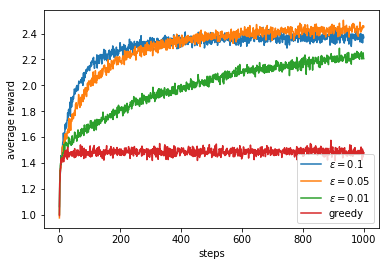

In [161]:
nb_steps = 1000
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")

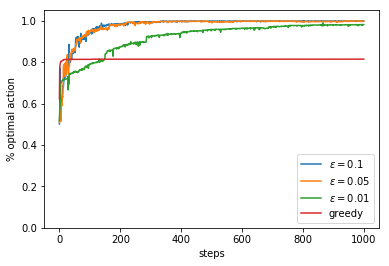

In [162]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")

### cumulative reward

In [182]:
cumulative_reward_e01 = np.sum(avg_rewards_e01)
cumulative_reward_e005 = np.sum(avg_rewards_e005)
cumulative_reward_e001 = np.sum(avg_rewards_e001)
cumulative_reward_greedy = np.sum(avg_rewards_greedy)

print("cumulative reward e=0.1: %s" %(cumulative_reward_e01))
print("cumulative reward e=0.05: %s" %(cumulative_reward_e005))
print("cumulative reward e=0.01: %s" %(cumulative_reward_e001))
print("cumulative reward e=0: %s" %(cumulative_reward_greedy))

cumulative reward e=0.1: 2291.96534747
cumulative reward e=0.05: 2287.078358
cumulative reward e=0.01: 1989.13487873
cumulative reward e=0: 1482.15802798


### cumulative probability of selecting

In [183]:
cumulative_probability_of_selecting_e01 = np.sum(optimal_actions_e01)
cumulative_probability_of_selecting_e005 = np.sum(optimal_actions_e005)
cumulative_probability_of_selecting_e001 = np.sum(optimal_actions_e001)
cumulative_probability_of_selecting_greedy = np.sum(optimal_actions_greedy)

print("cumulative probability of selecting e=0.1: %s" %(cumulative_probability_of_selecting_e01))
print("cumulative probability of selecting e=0.05: %s" %(cumulative_probability_of_selecting_e005))
print("cumulative probability of selecting e=0.01: %s" %(cumulative_probability_of_selecting_e001))
print("cumulative probability of selecting e=0: %s" %(cumulative_probability_of_selecting_greedy))

cumulative probability of selecting e=0.1: 977.722440806
cumulative probability of selecting e=0.05: 976.403182273
cumulative probability of selecting e=0.01: 920.303755008
cumulative probability of selecting e=0: 813.906238543


### Optimistic Initial Values
All the methods we have discussed so far are **dependent to some extent on the initial action-value estimates**, Q1(a). In the language of statistics, these methods are **biased by their initial estimates**. For the sample-average methods, the bias disappears once all actions have been selected at least once, but for methods **with constant α, the bias is permanent**, though decreasing over time as given by (2.6). In practice, this kind of **bias is usually not a problem and can sometimes be very helpful**. The **downside** is that the initial estimates become, in effect, a set of parameters that **must be picked by the user**, if only to set them all to zero. The **upside** is that they provide an **easy way to supply some prior knowledge about what level of rewards can be expected**.
Initial action values can also be **used as a simple way of encouraging exploration**. Suppose that instead of setting the initial action values to zero, as we did in the 10-armed testbed, we set them all to +5. Recall that the q∗(a) in this problem are selected from a normal distribution with mean 0 and variance 1. An initial estimate of +5 is thus wildly optimistic. But this optimism encourages action-value methods to explore. Whichever actions are initially selected, the reward is less than the starting estimates; the learner switches to other actions, being “disappointed” with the rewards it is receiving. The result is that all actions are tried several times before the value estimates converge. The system does a fair amount of exploration even if greedy actions are selected all the time.

In [163]:
avg_rewards_e01_optimistic, optimal_actions_e01_optimistic = get_average_rewards(epsilon=0.1, optimistic=5.)

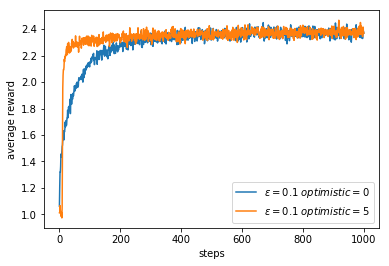

In [174]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$ $optimistic=0$')
plt.plot(np.arange(nb_steps), avg_rewards_e01_optimistic, label='$\epsilon=0.1$ $optimistic=5$')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")

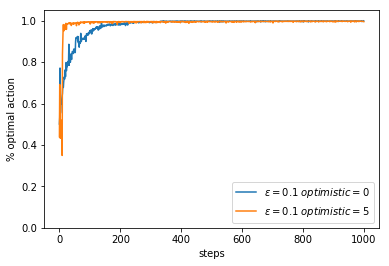

In [175]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$ $optimistic=0$')
plt.plot(np.arange(nb_steps), optimal_actions_e01_optimistic, label='$\epsilon=0.1$ $optimistic=5$')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")